In [3]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import ast

from sklearn import linear_model

# Data pre-processing/cleaning

In [4]:
!pip3 install sklearn

In [5]:
df = pd.read_csv('emily_election.csv')
df#contains no null values

,Unnamed: 0,ad_creative_bodies,demographic_distribution,delivery_by_region,estimated_audience_size,spend,impressions,ad_delivery_start_time,ad_delivery_stop_time,cumulative_impressions_by_region,cum_spend,days_between_ads,cumulative_ad_runtime,cumulative_est_audience
0,0,,"[[{'percentage': '0.000876', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}], ...","[{'lower_bound': '10001', 'upper_bound': '5000...","[{'lower_bound': '300', 'upper_bound': '399'},...","[{'lower_bound': '8000', 'upper_bound': '8999'...","['2021-10-30', '2021-10-27', '2021-10-20', '20...","['2021-11-02', '2021-10-31', '2021-10-23', '20...","{'New York': 27999.0, 'Georgia': 7000.0, 'Conn...",1347.5,"TimedeltaIndex(['3 days', '4 days', '3 days', ...",33 days,"{'New York': 1026000.0, 'Georgia': 1005001.0, ..."
1,1,!!!The government cannot fight CORRUPTION - th...,"[[{'percentage': '0.000933', 'age': '18-24', '...","[[{'percentage': '0.00185', 'region': 'Rhode I...",[{'lower_bound': '1000001'}],"[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '1000', 'upper_bound': '1999'}]",['2021-12-16'],['2021-12-23'],"{'Rhode Island': 1000.0, 'New York': 1000.0, '...",49.5,"TimedeltaIndex(['7 days'], dtype='timedelta64[...",7 days,"{'Rhode Island': 1000001.0, 'New York': 100000..."
2,2,!!🚨Endorsement Alert🚨!! \n\nThank you Byron Po...,"[[{'percentage': '0.004039', 'age': '65+', 'ge...","[[{'percentage': '0.002281', 'region': 'Unknow...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '100', 'upper_bound': '199'}]","[{'lower_bound': '2000', 'upper_bound': '2999'}]",['2021-11-16'],['2021-11-22'],"{'Unknown': 2499.5, 'New Mexico': 2499.5}",149.5,"TimedeltaIndex(['6 days'], dtype='timedelta64[...",6 days,"{'Unknown': 300000.5, 'New Mexico': 300000.5}"
3,3,""" An astute CPA told me 45 years ago, Math nev...","[[{'percentage': '0.00112', 'age': '18-24', 'g...","[[{'percentage': '1', 'region': 'Ohio'}], [{'p...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '0', 'upper_bound': '99'}, {'...","[{'lower_bound': '2000', 'upper_bound': '2999'...","['2021-12-22', '2021-11-14']","['2022-01-10', '2021-11-17']",{'Ohio': 5999.0},99.0,"TimedeltaIndex(['19 days', '3 days'], dtype='t...",22 days,{'Ohio': 600001.0}
4,4,"""....Framingham should not go back to the ways...","[[{'percentage': '0.004255', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'Massachusetts...","[{'lower_bound': '50001', 'upper_bound': '1000...","[{'lower_bound': '0', 'upper_bound': '99'}, {'...","[{'lower_bound': '0', 'upper_bound': '999'}, {...","['2021-11-01', '2021-10-27']","['2021-11-02', '2021-11-01']","{'Massachusetts': 499.5, 'Connecticut': 0.0, '...",99.0,"TimedeltaIndex(['1 days', '5 days'], dtype='ti...",6 days,"{'Massachusetts': 1000500.5, 'Connecticut': 10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,11732,🛡Protecting Taxpayers.\n📈Growing Our Economy.\...,"[[{'percentage': '0.001263', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}]]","[{'lower_bound': '5001', 'upper_bound': '10000'}]","[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '4000', 'upper_bound': '4999'}]",['2021-10-31'],['2021-11-01'],{'New York': 4499.5},49.5,"TimedeltaIndex(['1 days'], dtype='timedelta64[...",1 days,{'New York': 7500.5}
11733,11733,🟢Today is September 26th. \n🟡On October 23rd t...,"[[{'percentage': '0.003527', 'age': '45-54', '...","[[{'percentage': '0.012302', 'region': 'Florid...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '1000', 'upper_bound': '1999'}]",['2021-09-26'],['2021-09-30'],"{'Florida': 1499.5, 'Massachusetts': 1499.5, '...",49.5,"TimedeltaIndex(['4 days'], dtype='timedelta64[...",4 days,"{'Florida': 300000.5, 'Massachusetts': 300000...."
11734,11734,🤔 We get it—the 2022 midterm elections seem fa...,"[[{'percentage': '0.029101', 'age': '35-44', '...","[[{'percentage': '0.005291', 'region': 'Alabam...",

# Model 1: 2 features

In [6]:
"""
GOAL: predict spend for every region
FEATURES:
1. ad runtime
2. cumulative spend
"""

'\nGOAL: predict spend for every region\nFEATURES:\n1. ad runtime\n2. cumulative spend\n'

In [7]:
df['cum_spend']

0        1347.5
1          49.5
2         149.5
3          99.0
4          99.0
          ...  
11732      49.5
11733      49.5
11734     992.0
11735      49.5
11736      99.0
Name: cum_spend, Length: 11737, dtype: float64

In [8]:
df['spend'] = df['cum_spend']

In [9]:
df['runtime'] = df['cumulative_ad_runtime'].apply(lambda s: int(s.split('days')[0]))
df['impressions'] = df['cumulative_impressions_by_region'].apply(lambda d: ast.literal_eval(d))
df['impressions'] = df['impressions'].apply(lambda d: np.array(list(d.values())).sum())

#feature 3 (for later)
df['audience_size'] = df['cumulative_est_audience'].apply(lambda d: ast.literal_eval(d))
df['audience_size'] = df['audience_size'].apply(lambda d: np.array(list(d.values())).sum())

#data = df[['runtime', 'spend', 'impressions']]
data = df[['runtime', 'spend', 'audience_size','impressions']]
data

,runtime,spend,audience_size,impressions
0,33,1347.5,45631045.0,270998.0
1,7,49.5,51000051.0,51000.0
2,6,149.5,600001.0,4999.0
3,22,99.0,600001.0,5999.0
4,6,99.0,3000502.5,499.5
...,...,...,...,...
11732,1,49.5,7500.5,4499.5
11733,4,49.5,9600016.0,47984.0
11734,128,992.0,52812972.0,2271921.0
11735,26,49.5,3000.5,2499.5


In [10]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [11]:
train.head(30)

,runtime,spend,audience_size,impressions
0,33,1347.5,45631045.0,270998.0
1,7,49.5,51000051.0,51000.0
2,6,149.5,600001.0,4999.0
4,6,99.0,3000502.5,499.5
5,34,398.0,1005001.0,55000.0
7,2,49.5,30000.5,1499.5
8,14,449.5,3000.5,22499.5
9,14,349.5,3000.5,12499.5
10,4,49.5,51000051.0,255000.0
11,3,49.5,60001.0,2999.0


# Visualizing the Data

## Raw visualizations

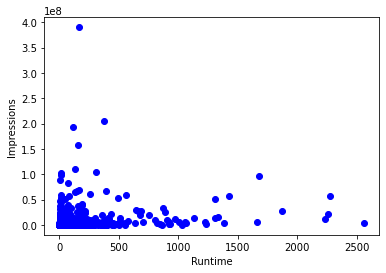

In [12]:
plt.scatter(train.runtime, train.impressions,  color='blue')
plt.xlabel("Runtime")
plt.ylabel("Impressions")
plt.show()

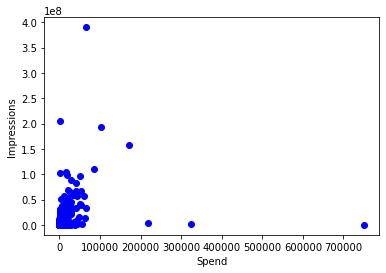

In [13]:
plt.scatter(train.spend, train.impressions,  color='blue')
plt.xlabel("Spend")
plt.ylabel("Impressions")
plt.show()

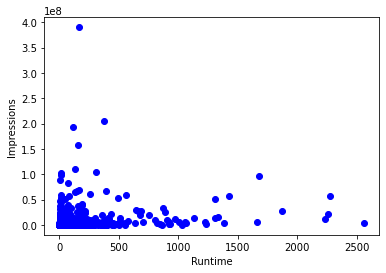

In [14]:
plt.scatter(train.runtime, train.impressions,  color='blue')
plt.xlabel("Runtime")
plt.ylabel("Impressions")
plt.show()

## After applying log transformation

/Users/chaninderrishi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


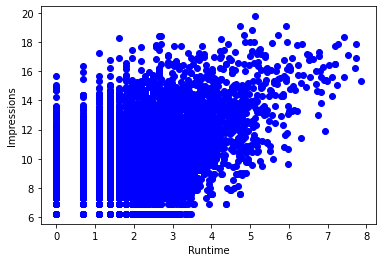

In [15]:
plt.scatter(np.log(train.runtime), np.log(train.impressions),  color='blue')
plt.xlabel("Runtime")
plt.ylabel("Impressions")
plt.show()

/Users/chaninderrishi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


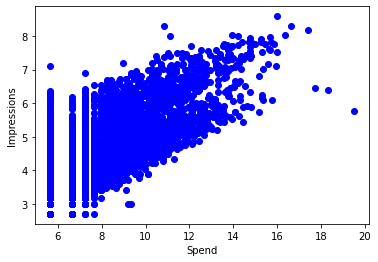

In [16]:
plt.scatter(np.log2(train.spend), np.log10(train.impressions),  color='blue')
plt.xlabel("Spend")
plt.ylabel("Impressions")
plt.show()

In [17]:
#new_train = train[train['impressions'] < 1000000]
new_train = train[(train['spend'] > 250)]
new_train = new_train[new_train['runtime']>4]
new_train.shape

(2055, 4)

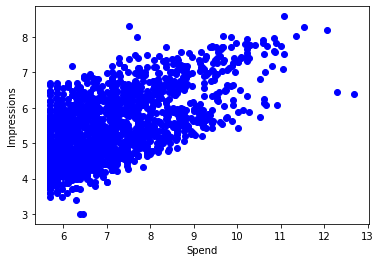

In [18]:
plt.scatter(np.log(new_train.spend), np.log10(new_train.impressions),  color='blue')
plt.xlabel("Spend")
plt.ylabel("Impressions")
plt.show()

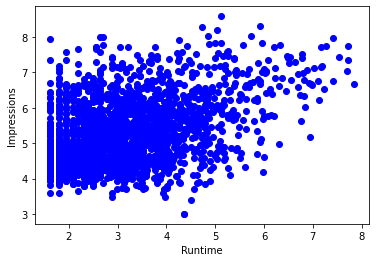

In [19]:
plt.scatter(np.log(new_train.runtime), np.log10(new_train.impressions),  color='blue')
plt.xlabel("Runtime")
plt.ylabel("Impressions")
plt.show()

In [20]:
#this model predicts impressions given the runtime and the spend

regr = linear_model.LinearRegression()
new_train['log_runtime'] = np.log(new_train['runtime'])
new_train['log_spend'] = np.log(new_train['spend'])
new_train['log_impressions'] = np.log(new_train['impressions'])
new_train.replace([np.inf, -np.inf], np.nan, inplace=True)
new_train.dropna(inplace=True)
x = np.asanyarray(new_train[['log_runtime', 'log_spend']])
y = np.asanyarray(new_train[['log_impressions']])
regr.fit (x, y)
y_pred= regr.predict(new_train[['log_runtime', 'log_spend']])
# # The coefficients
print(regr.coef_)
print('R-squared score: %.2f' % regr.score(x, y))
print('Standard Deviation: %.2f' % np.sqrt(sum((y - y_pred)**2) / (len(y) - 2)))


[[0.33396027 1.08591087]]
R-squared score: 0.43
Standard Deviation: 1.64


### saving the model

In [21]:
model = regr
model

LinearRegression()

In [22]:
import pickle

In [23]:
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model
loaded_model.predict([[40, 12]])

array([[29.93112324]])

In [25]:
#filtering for ads with a spend of over 250,000 and runtime of over 4 days

test = test[(test['spend'] > 250)]
test = test[test['runtime']> 4]
test['log_runtime'] = np.log(test['runtime'])
test['log_spend'] = np.log(test['spend'])
test['log_impressions'] = np.log(test['impressions'])
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.dropna(inplace=True)

/Users/chaninderrishi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
#result of passing in the test set into the linear model
y_hat= regr.predict(test[['log_runtime', 'log_spend']])

x = np.asanyarray(test[['log_runtime', 'log_spend']]) #test test
y = np.asanyarray(test[['log_impressions']]) # true outputs

# Explained variance score
print('R-squared score: %.2f' % regr.score(x, y))
print('Root mean squared error: %.2f' % np.sqrt(sum((y - y_hat)**2) / (len(y) - 2)))""

SyntaxError: invalid syntax (3024605910.py, line 9)

In [27]:
#make your prediction

#e.g: regr.predict([[RUNTIME IN DAYS, SPEND IN DOLLARS]])
pred=regr.predict([np.log([60, 10000])])
#68% Confidence interval
np.exp([pred[0][0]-1.65, pred[0][0]+1.65])

array([  574203.54472462, 15568173.3750805 ])

# Model 2: Classifier?

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
df

,Unnamed: 0,ad_creative_bodies,demographic_distribution,delivery_by_region,estimated_audience_size,spend,impressions,ad_delivery_start_time,ad_delivery_stop_time,cumulative_impressions_by_region,cum_spend,days_between_ads,cumulative_ad_runtime,cumulative_est_audience,runtime,audience_size
0,0,,"[[{'percentage': '0.000876', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}], ...","[{'lower_bound': '10001', 'upper_bound': '5000...",1347.5,270998.0,"['2021-10-30', '2021-10-27', '2021-10-20', '20...","['2021-11-02', '2021-10-31', '2021-10-23', '20...","{'New York': 27999.0, 'Georgia': 7000.0, 'Conn...",1347.5,"TimedeltaIndex(['3 days', '4 days', '3 days', ...",33 days,"{'New York': 1026000.0, 'Georgia': 1005001.0, ...",33,45631045.0
1,1,!!!The government cannot fight CORRUPTION - th...,"[[{'percentage': '0.000933', 'age': '18-24', '...","[[{'percentage': '0.00185', 'region': 'Rhode I...",[{'lower_bound': '1000001'}],49.5,51000.0,['2021-12-16'],['2021-12-23'],"{'Rhode Island': 1000.0, 'New York': 1000.0, '...",49.5,"TimedeltaIndex(['7 days'], dtype='timedelta64[...",7 days,"{'Rhode Island': 1000001.0, 'New York': 100000...",7,51000051.0
2,2,!!🚨Endorsement Alert🚨!! \n\nThank you Byron Po...,"[[{'percentage': '0.004039', 'age': '65+', 'ge...","[[{'percentage': '0.002281', 'region': 'Unknow...","[{'lower_bound': '100001', 'upper_bound': '500...",149.5,4999.0,['2021-11-16'],['2021-11-22'],"{'Unknown': 2499.5, 'New Mexico': 2499.5}",149.5,"TimedeltaIndex(['6 days'], dtype='timedelta64[...",6 days,"{'Unknown': 300000.5, 'New Mexico': 300000.5}",6,600001.0
3,3,""" An astute CPA told me 45 years ago, Math nev...","[[{'percentage': '0.00112', 'age': '18-24', 'g...","[[{'percentage': '1', 'region': 'Ohio'}], [{'p...","[{'lower_bound': '100001', 'upper_bound': '500...",99.0,5999.0,"['2021-12-22', '2021-11-14']","['2022-01-10', '2021-11-17']",{'Ohio': 5999.0},99.0,"TimedeltaIndex(['19 days', '3 days'], dtype='t...",22 days,{'Ohio': 600001.0},22,600001.0
4,4,"""....Framingham should not go back to the ways...","[[{'percentage': '0.004255', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'Massachusetts...","[{'lower_bound': '50001', 'upper_bound': '1000...",99.0,499.5,"['2021-11-01', '2021-10-27']","['2021-11-02', '2021-11-01']","{'Massachusetts': 499.5, 'Connecticut': 0.0, '...",99.0,"TimedeltaIndex(['1 days', '5 days'], dtype='ti...",6 days,"{'Massachusetts': 1000500.5, 'Connecticut': 10...",6,3000502.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,11732,🛡Protecting Taxpayers.\n📈Growing Our Economy.\...,"[[{'percentage': '0.001263', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}]]","[{'lower_bound': '5001', 'upper_bound': '10000'}]",49.5,4499.5,['2021-10-31'],['2021-11-01'],{'New York': 4499.5},49.5,"TimedeltaIndex(['1 days'], dtype='timedelta64[...",1 days,{'New York': 7500.5},1,7500.5
11733,11733,🟢Today is September 26th. \n🟡On October 23rd t...,"[[{'percentage': '0.003527', 'age': '45-54', '...","[[{'percentage': '0.012302', 'region': 'Florid...","[{'lower_bound': '100001', 'upper_bound': '500...",49.5,47984.0,['2021-09-26'],['2021-09-30'],"{'Florida': 1499.5, 'Massachusetts': 1499.5, '...",49.5,"TimedeltaIndex(['4 days'], dtype='timedelta64[...",4 days,"{'Florida': 300000.5, 'Massachusetts': 300000....",4,9600016.0
11734,11734,🤔 We get it—the 2022 midterm elections seem fa...,"[[{'percentage': '0.029101', 'age': '35-44', '...","[[{'percentage': '0.005291', 'region': 'Alabam...","[{'lower_bound': '1000001'}, {'lower_bound': '...",992.0,2271921.0,"['2021-10-15', '2021-10-15', '2021-10-15', '20...","['2021-10-18', '2021-10-19', '2021-10-18', '20...","{'Alabama': 43999.0, 'Ohio': 44998.0, 'Maine':...",992.0,"TimedeltaIndex([ '3 days', '4 days', '3 days...",128 days,"{'Alabama': 1035000.0, 'Ohio': 1035999.0, 'Mai...",128,52812972.0
11735,11735,🥳❄️ Join new and old friends for our annual h...,"[[{'percentage': '0.005556', 'age': '45-54', '...","[[{'percentage': '1', 'region'

In [31]:
prepoc = ColumnTransformer(
        transformers = [
            (),
        ], remainder = 'passthrough')
    
pl = Pipeline([
    ('preprocessor', prepoc),
    ('decision-tree', DecisionTreeClassifier(max_depth=4))
    ])
pl = Pipeline(

)

TypeError: __init__() missing 1 required positional argument: 'steps'

In [30]:
df[['spend', 'runtime', 'audience_size']]

,spend,runtime,audience_size
0,1347.5,33,45631045.0
1,49.5,7,51000051.0
2,149.5,6,600001.0
3,99.0,22,600001.0
4,99.0,6,3000502.5
...,...,...,...
11732,49.5,1,7500.5
11733,49.5,4,9600016.0
11734,992.0,128,52812972.0
11735,49.5,26,3000.5


In [116]:
df['audience_size'] = df['cumulative_est_audience'].apply(lambda d: ast.literal_eval(d))
df['audience_size'] = df['audience_size'].apply(lambda d: np.array(list(d.values())).sum())
df

,Unnamed: 0,ad_creative_bodies,demographic_distribution,delivery_by_region,estimated_audience_size,spend,impressions,ad_delivery_start_time,ad_delivery_stop_time,cumulative_impressions_by_region,cum_spend,days_between_ads,cumulative_ad_runtime,cumulative_est_audience,audience_size
0,0,,"[[{'percentage': '0.000876', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}], ...","[{'lower_bound': '10001', 'upper_bound': '5000...","[{'lower_bound': '300', 'upper_bound': '399'},...","[{'lower_bound': '8000', 'upper_bound': '8999'...","['2021-10-30', '2021-10-27', '2021-10-20', '20...","['2021-11-02', '2021-10-31', '2021-10-23', '20...","{'New York': 27999.0, 'Georgia': 7000.0, 'Conn...",1347.5,"TimedeltaIndex(['3 days', '4 days', '3 days', ...",33 days,"{'New York': 1026000.0, 'Georgia': 1005001.0, ...",45631045.0
1,1,!!!The government cannot fight CORRUPTION - th...,"[[{'percentage': '0.000933', 'age': '18-24', '...","[[{'percentage': '0.00185', 'region': 'Rhode I...",[{'lower_bound': '1000001'}],"[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '1000', 'upper_bound': '1999'}]",['2021-12-16'],['2021-12-23'],"{'Rhode Island': 1000.0, 'New York': 1000.0, '...",49.5,"TimedeltaIndex(['7 days'], dtype='timedelta64[...",7 days,"{'Rhode Island': 1000001.0, 'New York': 100000...",51000051.0
2,2,!!🚨Endorsement Alert🚨!! \n\nThank you Byron Po...,"[[{'percentage': '0.004039', 'age': '65+', 'ge...","[[{'percentage': '0.002281', 'region': 'Unknow...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '100', 'upper_bound': '199'}]","[{'lower_bound': '2000', 'upper_bound': '2999'}]",['2021-11-16'],['2021-11-22'],"{'Unknown': 2499.5, 'New Mexico': 2499.5}",149.5,"TimedeltaIndex(['6 days'], dtype='timedelta64[...",6 days,"{'Unknown': 300000.5, 'New Mexico': 300000.5}",600001.0
3,3,""" An astute CPA told me 45 years ago, Math nev...","[[{'percentage': '0.00112', 'age': '18-24', 'g...","[[{'percentage': '1', 'region': 'Ohio'}], [{'p...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '0', 'upper_bound': '99'}, {'...","[{'lower_bound': '2000', 'upper_bound': '2999'...","['2021-12-22', '2021-11-14']","['2022-01-10', '2021-11-17']",{'Ohio': 5999.0},99.0,"TimedeltaIndex(['19 days', '3 days'], dtype='t...",22 days,{'Ohio': 600001.0},600001.0
4,4,"""....Framingham should not go back to the ways...","[[{'percentage': '0.004255', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'Massachusetts...","[{'lower_bound': '50001', 'upper_bound': '1000...","[{'lower_bound': '0', 'upper_bound': '99'}, {'...","[{'lower_bound': '0', 'upper_bound': '999'}, {...","['2021-11-01', '2021-10-27']","['2021-11-02', '2021-11-01']","{'Massachusetts': 499.5, 'Connecticut': 0.0, '...",99.0,"TimedeltaIndex(['1 days', '5 days'], dtype='ti...",6 days,"{'Massachusetts': 1000500.5, 'Connecticut': 10...",3000502.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,11732,🛡Protecting Taxpayers.\n📈Growing Our Economy.\...,"[[{'percentage': '0.001263', 'age': '45-54', '...","[[{'percentage': '1', 'region': 'New York'}]]","[{'lower_bound': '5001', 'upper_bound': '10000'}]","[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '4000', 'upper_bound': '4999'}]",['2021-10-31'],['2021-11-01'],{'New York': 4499.5},49.5,"TimedeltaIndex(['1 days'], dtype='timedelta64[...",1 days,{'New York': 7500.5},7500.5
11733,11733,🟢Today is September 26th. \n🟡On October 23rd t...,"[[{'percentage': '0.003527', 'age': '45-54', '...","[[{'percentage': '0.012302', 'region': 'Florid...","[{'lower_bound': '100001', 'upper_bound': '500...","[{'lower_bound': '0', 'upper_bound': '99'}]","[{'lower_bound': '1000', 'upper_bound': '1999'}]",['2021-09-26'],['2021-09-30'],"{'Florida': 1499.5, 'Massachusetts': 1499.5, '...",49.5,"TimedeltaIndex(['4 days'], dtype='timedelta64[...",4 days,"{'Florida': 300000.5, 'Massachusetts': 300000....",9600016.0
11734,11734,🤔 We get it—the 2022 midterm elections seem fa...,"[[{'percentage': '

In [152]:
np.mean(new_train['spend'])

3111.8956780923995